В рамках данного урока мы:
* Продолжаем тренироваться обучать и применять модели машинного обучения
* Осуществляем детальное изучение метрик классификации
* Выясняем, для каких ситуаций подходят различные метрики

# Метрики в задачах классификации

Давайте теперь рассмотрим метрики, используемые в задачах классификации. В данном Jupyter ноутбуке заданий будет не так много, как в предыдущем, однако они будут направлены на развитие навыков самостоятельной работы с документацией и умения находить необходимые сведения.

### **[Задание 1]**

Импортируйте библиотеки, запустив код ниже.

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns

### Набор данных
Для сравнения различных метрик мы будем использовать набор данных о раке груди [Breast Cancer Dataset](https://goo.gl/U2Uwz2), предоставленный библиотекой `scikit-learn` в модуле `dataset`. Этот набор данных используется для бинарной классификации между двумя типами рака.

### **[Задание 2]**

Сейчас мы загрузим данные из датасета библиотеки scikit-learn. Выполните код:

In [ ]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()

С особенностями датасетам можно ознакомиться, вызвав метод `DESCR`.

In [ ]:
print(data.DESCR[:760])

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline appr


Давайте посмотрим, какие классы целевых переменных есть, то есть какие типы рака представлены в данных.

In [ ]:
print(f"Типы раковых новообразований: {data.target_names}")

Типы раковых новообразований: ['malignant' 'benign']



Какова размерность данных?
Мы видим, что в данных имеется 569 примеров, и каждый пример содержит 30 признаков.

Значение целевой переменной определено бинарно, где 0 соответствует злокачественным опухолям, а 1 соответствует доброкачественным.

Для нашего исследования мы возьмем за основу, что доброкачественные опухоли представляют собой позитивный класс, а злокачественные – негативный. Таким образом, мы можем трактовать значения следующим образом:
*   0 означает "опухоль не является доброкачественной",
*   1 означает "опухоль является доброкачественной".



### **[Задание 3]**

Разделите данные на признаки `X` и целевую переменную `y`.


### **[Задание 4]**

Разделите данные на обучающую и тестовую выборки. Установите соотношение разделения с помощью параметра `test_size` (например, `testsize=0.2`) и при необходимости задайте случайное значение для параметра `random_state`.

## Обучение модели и прогон на тестовой выборке

### **[Задание 5]**

Инициализируйте модель бинарной классификации, используя `LogisticRegression`. Саму модель сохраните в переменную `classifier`.

В следующей теме мы рассмотрим подробно устройство и теоретическую базу логистической регрессии, пока же рассматриваем её, как некоторый "черный ящик", благодаря которому сможем попрактиковаться в вычислении метрик.


In [ ]:
classifier = LogisticRegression(random_state=0)

### **[Задание 6]**

Обучите модель на обучающих данных.

Получим вектор с предсказаниями модели `y_preds` и вектор вероятностей `y_proba`.

In [ ]:
y_preds = classifier.predict(X_test)
y_proba = classifier.predict_proba(X_test)

Если мы выведем полученные вероятности `y_proba`, то будет нечто такое:

In [ ]:
y_proba

Этот формат не удобен (нам было бы более привычным представление в виде одномерного массива). Выведем одномерный вектор вероятностей возникновения рака типа `benign`.

In [ ]:
y_proba = y_proba[:,1].reshape((y_proba.shape[0],))

Сравним тестовые метки классов с предсказанными.

In [ ]:
y_proba[:5], y_preds[:5], y_test[:5]

### Confusion Matrix

Обсудим первый метод оценки качества работы модели — матрицу ошибок.

В области бинарной классификации задача обычно связана с выявлением нечасто встречающегося события среди множества случаев, таких как диагностика рака у человека.

Следовательно, класс, который вызывает у нас интерес, будем называть "позитивным", в то время как другой класс — "негативным".

Мы можем столкнуться с четырьмя различными исходами при классификации объектов в наборе данных. Рассмотрим их и дадим краткое описание:
 1. **Истинно положительное (TP)**: Предсказана положительная метка и она оказалась верной. Объекты с подобным исходом относим к группе TP. "Истинно", потому что предсказание верно. "Положительное", т.к. метка положительная.
 2. **Ложно положительное (FP)**: Предсказана положительная метка, но предсказание оказалось неверным. Объекты с такими исходами относим к группе FP. "Ложно", поскольку предсказание ошибочно.
 3. **Истинно отрицательное (TN)**: Предсказана отрицательная метка, и она оказалась верной. Объекты в данной ситуации отнесем к группе TN.
 4. **Ложно отрицательное (FN)**: Предсказана отрицательная метка, но это оказалось не так. Такие объекты классифицируем как FN.

Для наглядности эти 4 числа можно представить в виде таблицы, которая называется матрицей ошибок или confusion matrix. Эта матрица реализована в библиотеке `scikit-learn` в модуле [`sklearn.metrics.confusion_matrix`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html).

In [ ]:
conf = metrics.confusion_matrix(y_test, y_preds)
conf

Для того, чтобы изобразить confusion matrix  можно воспользоваться методом [`ConfusionMatrixDisplay`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html)

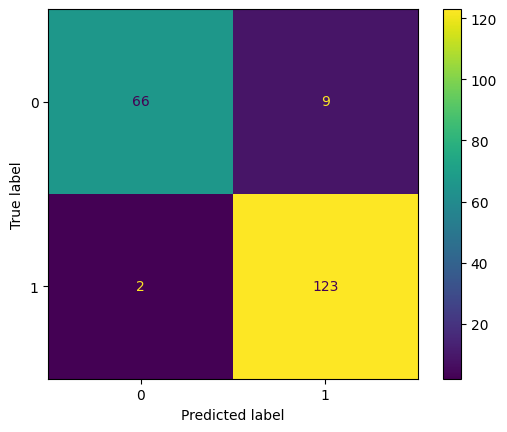

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

disp = ConfusionMatrixDisplay(confusion_matrix=conf, display_labels=classifier.classes_)
disp.plot()
plt.show()

С помощью `confusion matrix`, мы можем увидеть количество случаев, правильно предсказанных нашей моделью для каждого класса.

## Метрики

Теперь мы рассчитаем несколько основных метрик на основе четырех значений, составляющих confustion matrix.

 Давайте создадим словарь с именем `results`, чтобы хранить все эти метрики.

In [ ]:
results = {}

In [ ]:
# значения из confusion matrix
TP = true_pos = 123
TN = true_neg = 68
FP = false_pos = 7
FN = false_neg = 2

#### Accuracy

Самым первым из всех критериев качества, который сразу приходит в голову является точность (accuracy) - доля объектов, для которых был правильно предсказан класс.

![alt text](https://wikimedia.org/api/rest_v1/media/math/render/svg/c72ec21ef2505c2d376e96197637fc64f75e5891)

Есть также сопряженная метрика - ошибка классификации (error rate), которая представляет собой долю неправильных предсказаний:
`Error rate = 1 - Accuracy`

Более внимательное рассмотрение метрики accuracy выявляет некоторые ее недостатки:


*   Accuracy не учитывает дисбаланс классов. Например, в задаче диагностики редких заболеваний классификатор, предсказывающий всем пациентам отсутствие болезни, будет иметь достаточно высокую точность только из-за того, что больных людей в выборке гораздо меньше;
*  Она также игнорирует цену ошибки для объектов разных классов. Возьмем, например, задачу медицинской диагностики: если ложно-положительный диагноз для здорового пациента приводит только к дополнительному обследованию, то ложно-отрицательный вердикт может иметь фатальные последствия.

In [ ]:
metric = "Accuracy"
results[metric] = (TP + TN) / (TP + TN + FP + FN)
print(f"{metric} is {results[metric]: .3f}")

Но если вам не хочется каждый раз считать точность с помощью арифметических операций над компонентами confusion matrix, то `sklearn` уже решил вашу проблему: достаточно импортировать `accuracy_score` из модуля `sklearn.metrics`.


In [ ]:
y_proba

In [ ]:
y_test

In [ ]:
from sklearn.metrics import accuracy_score

# Рассчитываем accuracy как разницу между ожидаемыми и предсказанными значениями
accuracy = accuracy_score(y_test, y_preds)


Выведем метрику из `sklearn`

In [ ]:
accuracy

Как видим, наше значение метрики, которое мы вычислили руками из confusion matrix, не сильно отклонилось от библиотечного

#### True Positive Rate (Recall)

Число образцов, фактически и предсказанных как положительные / общее число фактически положительных образцов.
Также называется **Sensitivity или Recall** (чувствительность или полнота).

![alt text](https://wikimedia.org/api/rest_v1/media/math/render/svg/64d5540cbadeb83f864d7a731b7ab43cccd0f353)


In [ ]:
# Sensitivity or Recall
metric = "TPR"
results[metric] = TP / (TP + FN)
print(f"{metric} is {results[metric]: .3f}")

#### True Negative Rate (Specificity)

Коэффициент истинно отрицательных результатов (True Negative Rate) означает количество образцов, которые действительно и были предсказаны как отрицательные, делённое на общее количество образцов, которые на самом деле отрицательны. Также называется **Specificity**(специфичностью)

![alt text](https://wikimedia.org/api/rest_v1/media/math/render/svg/aac65b6586cb61c1268403895012c2a8f19b0c5e)


In [ ]:
# Specificity
metric = "TNR"
results[metric] = TN / (TN + FP)
print(f"{metric} is {results[metric]: .3f}")

#### Positive Predictive Value (Precision)

Положительное предсказательное значение (Positive Predictive Value)  - это количество образцов, которые действительно и были предсказаны как положительные, делённое на общее количество образцов, предсказанных как положительные.
Еще его называют **Precision**.  

![alt text](https://wikimedia.org/api/rest_v1/media/math/render/svg/699fcdb880b7f6a92742bc0845b8b60b59806a98)


In [ ]:
# Precision
metric = "PPV"
results[metric] = TP / (TP + FP)
print(f"{metric} is {results[metric]: .3f}")

#### Negative Predictive Value

Отрицательное предсказательное значение (Negative Predictive Value) - это количество образцов, которые на самом деле и были предсказаны как отрицательные, делённое на общее количество образцов, предсказанных как отрицательные.

![alt text](https://wikimedia.org/api/rest_v1/media/math/render/svg/b6da0f59faffbc1704974e97847ab4fa599f5521)




In [ ]:
metric = "NPV"
results[metric] = TN / (TN + FN)
print(f"{metric} is {results[metric]: .3f}")

#### F1 score
F1-мера (F1 score) - это среднее гармоническое значение точности и полноты.
!alt text

В контексте классификации, точность (precision) измеряет, какая доля объектов, определенных как положительные, действительно является положительными, а полнота (recall) измеряет, какая доля положительных объектов была правильно обнаружена. F1-мера является комбинацией этих двух метрик и представляет собой баланс между точностью и полнотой. Чем выше F1-мера, тем лучше производительность модели классификации.


![alt text](https://wikimedia.org/api/rest_v1/media/math/render/svg/5663ca95d471868169c4e4ea57c936f1b6f4a588)


In [ ]:
metric = "F1"
results[metric] = 2 / (1 / results["PPV"] + 1 / results["TPR"])
print(f"{metric} is {results[metric]: .3f}")

### Сравнение этих показателей
Давайте проверим, соответствуют ли эти значения значениям, рассчитанным с помощью функций scikit-learn.

In [ ]:
print(f"Calculated and Actual Accuracy:                          {results['Accuracy']: .3f}, {metrics.accuracy_score(y_test, y_preds): .3f}")
print(f"Calculated and Actual Precision score:                   {results['PPV']: .3f}, {metrics.precision_score(y_test, y_preds): .3f}")
print(f"Calculated and Actual Recall score:                      {results['TPR']: .3f}, {metrics.recall_score(y_test, y_preds): .3f}")
print(f"Calculated and Actual F1 score:                          {results['F1']: .3f}, {metrics.f1_score(y_test, y_preds): .3f}")


В задачах классификации различные метрики используются для оценки разных аспектов работы модели. Вот краткое объяснение, когда использовать каждую из следующих метрик:

1. `Accuracy` измеряет, какая доля всех прогнозов модели является правильной. Она особенно полезна, когда классы в задаче классификации **сбалансированы**, то есть количество примеров положительного и отрицательного классов примерно одинаково. `Accuracy` может быть использована как общая метрика оценки производительности модели. Однако при дисбалансе классов она может стать вводящей в заблуждение, поскольку высокую точность можно достичь, просто предсказывая большинство примеров как отрицательные.

2. `True Positive Rate`, также известная как чувствительность, отражает, какая доля действительно положительных примеров была корректно предсказана моделью. Эта метрика полезна, когда важно правильно идентифицировать положительные примеры, например, в задачах, где неправильная классификация положительного примера может иметь серьезные последствия.

3. `True Negative Rate`, также известная как специфичность, показывает, какую долю действительно отрицательных примеров модель корректно предсказала. Эта метрика полезна в ситуациях, когда важно точно определить отрицательные примеры, так как они могут иметь специальные требования или ограничения.

4. `Positive Predicted Value`, также известная как точность, отражает, какую долю всех предсказанных положительных примеров на самом деле являются положительными. Эта метрика полезна, когда важно ограничить число ложноположительных прогнозов, так как они могут вызывать лишние затраты или ошибочные действия.

5. `Negative Predicted Value` показывает, какую долю отрицательных примеров модель правильно предсказала из общего числа предсказанных отрицательных примеров. Она полезна в ситуациях, где важно минимизировать ложноотрицательные прогнозы, которые могут пропустить важные события или объекты.

### ROC кривая - бонус
ROC кривая (Receiver Operating Characteristic curve), или ROC кривая, это графическое представление, которое иллюстрирует диагностическую способность бинарной классификационной системы при изменении порогового значения. Подробно она будет рассмотрена в следующей теме, но вы можете начать знакомство с ней сейчас.


ROC кривая создается путем построения графика Доли истинно положительных (TPR) от Доли ложно положительных (FPR) при различных пороговых значениях.  

ROC-кривая позволяет оценить способность модели различать результаты между классами и эффективность ее классификации. Она представляет собой площадь под графиком ROC-кривой. ROC-кривая отображает соотношение между Долей истинно положительных (TPR) и Долей ложно положительных (FPR) при различных пороговых значениях.

Анализ ROC-AUC помогает определить, насколько хорошо модель способна разделять классы. Чем ближе значение ROC-AUC к 1, тем лучше модель различает классы. Значение 0.5 означает случайный выбор, а значение менее 0.5 указывает на неправильную классификацию.

Давайте построим ROC кривую для набора данных о раке груди.  


In [ ]:
FPRs, TPRs, _ = metrics.roc_curve(y_test, y_proba)

In [ ]:
from sklearn.metrics import RocCurveDisplay

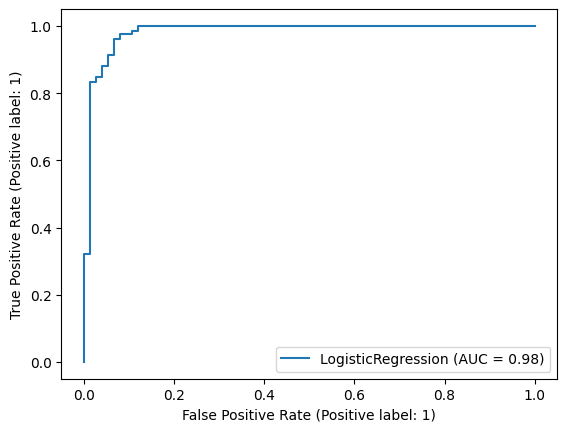

In [ ]:
RocCurveDisplay.from_estimator(classifier, X_test, y_test)

### Оценка ROC-AUC
Теперь, когда мы знаем о кривой ROC и о том, что она из себя представляет, очень легко понять оценку AUC.  

AUC - это площадь под ROC-кривой. Как мы видели, полностью случайный прогноз будет иметь оценку AUC 0,5, в то время как идеальный классификатор будет иметь оценку AUC 1.

Зафиксируем разницу в терминах:


*   **ROC-кривая** (кривая характеристики приемников) - **это график**, который показывает зависимость между чувствительностью (вероятность обнаружения положительного класса) и специфичностью (вероятность обнаружения отрицательного класса) модели классификации. Она является инструментом для оценки качества модели и позволяет определить ее эффективность.
*   **Оценка ROC-AUC** (площадь под кривой ROC) представляет собой **числовую метрику**, которая характеризует качество модели классификации. Она вычисляется путем вычисления площади, ограниченной ROC-кривой и осью диагонали. ROC-AUC находится в диапазоне от 0 до 1, где 0.5 соответствует случайному классификатору, а 1 соответствует идеальному классификатору. Чем ближе значение ROC-AUC к 1, тем лучше модель классификации


Вычислить AUC-метрику можно с помощью `sklearn` можно с помощью метода `metrics.roc_auc_score`

In [ ]:
auc_score = metrics.roc_auc_score(y_test, y_proba)
print(f"Scikit's ROC-AUC score of SVC model is {auc_score: .4f}")

Scikit's ROC-AUC score of SVC model is  0.9825


У данной метрики есть класс недостатков

1. Нечувствительность к дисбалансу классов: ROC-AUC не учитывает дисбаланс классов в данных. Если классы несбалансированы и большинство примеров относятся к одному классу, то ROC-AUC может давать завышенную оценку производительности классификатора.

2. Чувствительность к пороговому значению: ROC-AUC зависит от выбранного порогового значения классификации. Если пороговое значение изменится, то кривая ROC и значение AUC могут также измениться.

3. Неинтерпретируемость абсолютных значений: ROC-AUC дает информацию о качестве классификатора, но не дает абсолютные значения для вероятностей классификации или предсказаний классов, что может быть неуклюжим при сравнении разных моделей или алгоритмов.

4. Зависимость от порядка классификации: ROC-AUC основан на ранжировании наблюдений в порядке убывания вероятности принадлежности к положительному классу. Порядок значений вероятностей может сильно влиять на ROC-AUC, особенно при наличии повторяющихся значений.
